In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
#pandas读写csv的两个方法
#法一
# 每个列表表示csv文件里面的一列
a = [1, 2, 3]
b = [4, 5, 6]
c = [7, 8, 9]
# 字典中的key值就是csv中的列名
csv_file = pd.DataFrame({'x': a, 'y': b, 'z': c})

#法二
df = pd.read_excel('customer_data_V3.xlsx',sheet_name=0)
df.head()

,ID,age,marital,income,house,business,property,debt,job,credit,relation,class
0,C001,5,5,3,3,1,12,10,7,0,3,1
1,C002,5,5,3,3,2,15,10,7,5,4,1
2,C003,5,5,5,3,2,12,7,7,4,4,1
3,C004,5,5,2,3,1,8,10,4,5,1,0
4,C005,5,5,3,3,1,8,7,7,4,1,0


In [10]:
df.describe()

,age,marital,income,house,business,property,debt,job,credit,relation,class
count,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000
mean,4.664815,4.322222,3.725926,2.887037,1.785185,11.088889,8.777778,6.400000,3.931481,2.059259,0.533333
std,0.731394,1.375598,0.979793,0.344878,0.433053,2.842734,1.856310,1.201113,1.602679,1.289391,0.499350
min,2.000000,1.000000,2.000000,1.000000,1.000000,4.000000,4.000000,4.000000,0.000000,1.000000,0.000000
25%,5.000000,5.000000,3.000000,3.000000,2.000000,8.000000,7.000000,7.000000,4.000000,1.000000,0.000000
50%,5.000000,5.000000,3.000000,3.000000,2.000000,12.000000,10.000000,7.000000,5.000000,2.000000,1.000000
75%,5.000000,5.000000,5.000000,3.000000,2.000000,12.000000,10.000000,7.000000,5.000000,3.000000,1.000000
max,5.000000,5.000000,5.000000,3.000000,3.000000,15.000000,10.000000,7.000000,5.000000,5.000000,1.000000


In [11]:
df.info()#无缺失值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        540 non-null    object
 1   age       540 non-null    int64 
 2   marital   540 non-null    int64 
 3   income    540 non-null    int64 
 4   house     540 non-null    int64 
 5   business  540 non-null    int64 
 6   property  540 non-null    int64 
 7   debt      540 non-null    int64 
 8   job       540 non-null    int64 
 9   credit    540 non-null    int64 
 10  relation  540 non-null    int64 
 11  class     540 non-null    int64 
dtypes: int64(11), object(1)
memory usage: 50.8+ KB


   探索性分析

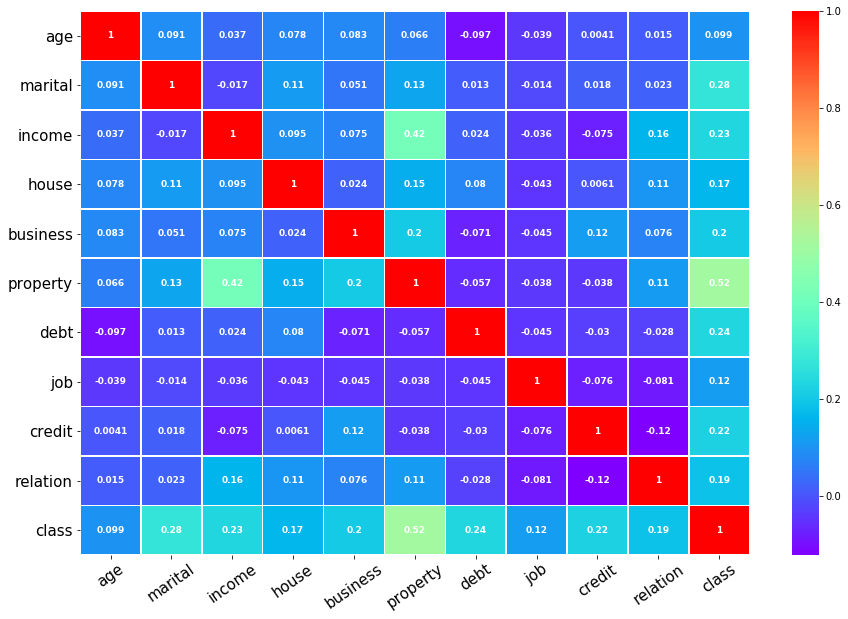

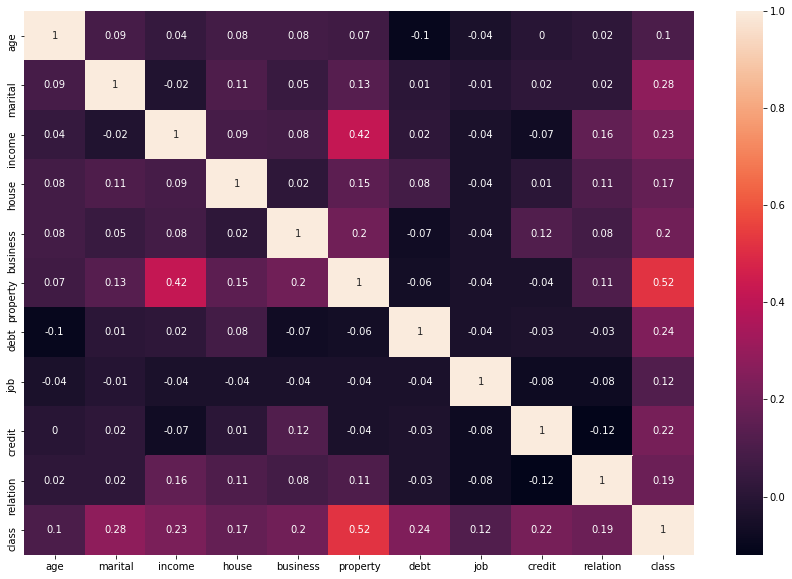

In [12]:
import seaborn as sns
corr = df.corr()#计算各变量的相关性系数
xticks = list(corr.index)#x轴标签
yticks = list(corr.index)#y轴标签
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(1, 1, 1)
sns.heatmap(corr, annot=True, cmap="rainbow",ax=ax1,linewidths=.5, annot_kws={'size': 9, 'weight': 'bold', 'color': 'white'})
ax1.set_xticklabels(xticks, rotation=35, fontsize=15)
ax1.set_yticklabels(yticks, rotation=0, fontsize=15)
plt.show()
r=df.corr()#相关系数
r=r.round(2)
plt.figure(figsize=(15,10))
sns.heatmap(data=r,annot=True)

可以看到各变量之间的相关性比较小，所以不需要操作，一般相关系数大于0.6可以进行变量剔除。

In [13]:
Y = df['class']
X = df.iloc[:,1:11]#切片，row_slice = rows.iloc[0:2, 1:3]  # 取rows的0-1行，1-2列的元素
X.head()

,age,marital,income,house,business,property,debt,job,credit,relation
0,5,5,3,3,1,12,10,7,0,3
1,5,5,3,3,2,15,10,7,5,4
2,5,5,5,3,2,12,7,7,4,4
3,5,5,2,3,1,8,10,4,5,1
4,5,5,3,3,1,8,7,7,4,1


In [14]:
#归一化三种方法
#def MaxMinNormalization(X,Max,Min):
    #X = (X - Min) / (Max - Min);
    #return X
#def sigmoid(X,useStatus):
 #   if useStatus:
  #      return 1.0 / (1 + np.exp(-float(X)));
   # else:
    #    return float(X)
#def Z_ScoreNormalization(X,mu,sigma):
 #   X0 = (X - mu) / sigma;
  #  return X0

def normalization(x):
    _range = np.max(X) - np.min(X)
    return (X - np.min(X)) / _range
X0 = normalization(X)

X0.head()

,age,marital,income,house,business,property,debt,job,credit,relation
0,1.0,1.0,0.333333,1.0,0.0,0.727273,1.0,1.0,0.0,0.50
1,1.0,1.0,0.333333,1.0,0.5,1.000000,1.0,1.0,1.0,0.75
2,1.0,1.0,1.000000,1.0,0.5,0.727273,0.5,1.0,0.8,0.75
3,1.0,1.0,0.000000,1.0,0.0,0.363636,1.0,0.0,1.0,0.00
4,1.0,1.0,0.333333,1.0,0.0,0.363636,0.5,1.0,0.8,0.00


In [15]:
#归一化散点图?
#plt.scatter(X0[:,1],X0[:,0])
#plt.show()

In [16]:
#当因变量Y为2分类变量（或多分类变量时）可以用相应的logistic回归分析各个自变量对因变量的影响程度
X1=sm.add_constant(X0)
logit=sm.Logit(Y,X1)
result=logit.fit()
print(result.summary())
#直接通过返回结果中各变量的P值与0.05比较，来判定对应的解释变量的显著性，P<0.05则认为自变量具有统计学意义

Optimization terminated successfully.
         Current function value: 0.333376
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  class   No. Observations:                  540
Model:                          Logit   Df Residuals:                      529
Method:                           MLE   Df Model:                           10
Date:                Wed, 27 Apr 2022   Pseudo R-squ.:                  0.5175
Time:                        21:20:52   Log-Likelihood:                -180.02
converged:                       True   LL-Null:                       -373.10
                                        LLR p-value:                 8.318e-77
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -19.8169      2.024     -9.790      0.000     -23.784     -15.850
age            1.6247      0.

信用评分卡主要使用的算法模型是逻辑回归。logistic模型客群变化的敏感度不如其他高复杂度模型，因此稳健更好，鲁棒性更强。另外，模型直观，系数含义好阐述、易理解，使用逻辑回归优点是可以得到一个变量之间的线性关系式和对应的特征权值，方便后面将其转成一一对应的分数形式。

In [20]:
#logistics训练
#from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.6,random_state=0)
model=LogisticRegression()
clf=model.fit(x_train,y_train)
print('测试成绩：{}'.format(clf.score(x_test,y_test)))
 

测试成绩：0.8302469135802469


In [22]:
coe=clf.coef_        #特征权值系数，后面转换为打分规则时会用到
coe

array([[0.6746201 , 0.89695392, 0.22335761, 0.25987967, 0.54355577,
        0.76213001, 0.78515697, 0.81213935, 1.01461935, 0.94544343]])

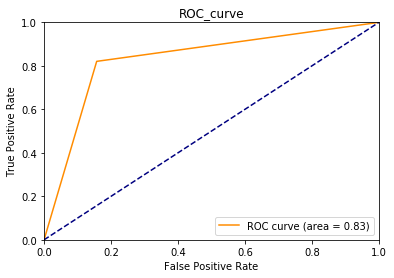

In [23]:
y_pred=clf.predict(x_test)
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_curve')
plt.legend(loc="lower right")
plt.show()

In [24]:
roc_auc

0.8317546583850932

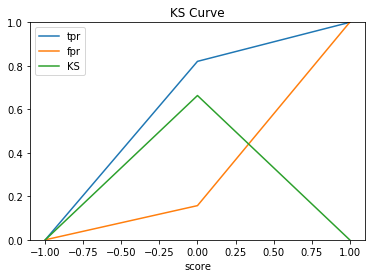

<Figure size 1440x1440 with 0 Axes>

In [25]:
fig, ax = plt.subplots()
ax.plot(1 - threshold, tpr, label='tpr') # ks曲线要按照预测概率降序排列，所以需要1-threshold镜像
ax.plot(1 - threshold, fpr, label='fpr')
ax.plot(1 - threshold, tpr-fpr,label='KS')
plt.xlabel('score')
plt.title('KS Curve')
plt.ylim([0.0, 1.0])
plt.figure(figsize=(20,20))
legend = ax.legend(loc='upper left')
plt.show()

In [26]:
max(tpr-fpr)#K-s值

0.6635093167701863

# 神经网络模型

In [27]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X, Y, test_size = 0.6, random_state = 0)#二氧化硅


In [28]:
import tensorflow as tf
# 建立模型
model1=tf.compat.v2.keras.Sequential()
# 74个神经元进行线性拟合
model1.add(tf.compat.v2.keras.layers.Dense(10,input_shape=(None,10)))
# 输出层
model1.add(tf.compat.v2.keras.layers.Dense(1))
# 定义梯度下降算法和损失函数

model1.compile(optimizer='adam',loss='mse',metrics=['accuracy'])
# 训练2500次
history=model1.fit(X1_train,Y1_train,epochs=1000)

Epoch 1/1000
7/7 [==============================] - 1s 4ms/step - loss: 5.4635 - accuracy: 0.4769
Epoch 2/1000
7/7 [==============================] - 0s 4ms/step - loss: 4.3122 - accuracy: 0.4630
Epoch 3/1000
7/7 [==============================] - 0s 5ms/step - loss: 4.1858 - accuracy: 0.4491
Epoch 4/1000
7/7 [==============================] - 0s 4ms/step - loss: 3.8268 - accuracy: 0.4398
Epoch 5/1000
7/7 [==============================] - 0s 4ms/step - loss: 3.7218 - accuracy: 0.4722
Epoch 6/1000
7/7 [==============================] - 0s 5ms/step - loss: 3.4863 - accuracy: 0.4722
Epoch 7/1000
7/7 [==============================] - 0s 4ms/step - loss: 3.3384 - accuracy: 0.4398
Epoch 8/1000
7/7 [==============================] - 0s 5ms/step - loss: 3.1401 - accuracy: 0.4444
Epoch 9/1000
7/7 [==============================] - 0s 4ms/step - loss: 2.9929 - accuracy: 0.4444
Epoch 10/1000
7/7 [==============================] - 0s 4ms/step - loss: 2.8238 - accuracy: 0.4444
Epoch 11/1000
7/7 [

7/7 [==============================] - 0s 4ms/step - loss: 0.3016 - accuracy: 0.6157
Epoch 78/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.2929 - accuracy: 0.6157
Epoch 79/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.2919 - accuracy: 0.6065
Epoch 80/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.2825 - accuracy: 0.6481
Epoch 81/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.2810 - accuracy: 0.6435
Epoch 82/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.2775 - accuracy: 0.6296
Epoch 83/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.2716 - accuracy: 0.6528
Epoch 84/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.2689 - accuracy: 0.6620
Epoch 85/1000
7/7 [==============================] - 0s 5ms/step - loss: 0.2636 - accuracy: 0.6759
Epoch 86/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.2609 - accuracy: 0.6620
Epoch 87/1000
7/7 [=====

7/7 [==============================] - 0s 3ms/step - loss: 0.1679 - accuracy: 0.7454
Epoch 160/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1652 - accuracy: 0.7639
Epoch 161/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1691 - accuracy: 0.7222
Epoch 162/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.1701 - accuracy: 0.7315
Epoch 163/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.1649 - accuracy: 0.7685
Epoch 164/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1650 - accuracy: 0.7593
Epoch 165/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.1658 - accuracy: 0.7593
Epoch 166/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1658 - accuracy: 0.7500
Epoch 167/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1644 - accuracy: 0.7685
Epoch 168/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.1683 - accuracy: 0.7361
Epoch 169/1000


7/7 [==============================] - 0s 3ms/step - loss: 0.1470 - accuracy: 0.8194
Epoch 242/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1462 - accuracy: 0.8102
Epoch 243/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.1486 - accuracy: 0.8102
Epoch 244/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.1478 - accuracy: 0.8056
Epoch 245/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1469 - accuracy: 0.8102
Epoch 246/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.1496 - accuracy: 0.7546
Epoch 247/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.1482 - accuracy: 0.8194
Epoch 248/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1474 - accuracy: 0.7917
Epoch 249/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1454 - accuracy: 0.8148
Epoch 250/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.1462 - accuracy: 0.8148
Epoch 251/1000


7/7 [==============================] - 0s 3ms/step - loss: 0.1382 - accuracy: 0.8102
Epoch 324/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.1421 - accuracy: 0.8102
Epoch 325/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.1390 - accuracy: 0.8056
Epoch 326/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.1383 - accuracy: 0.8287
Epoch 327/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1380 - accuracy: 0.8148
Epoch 328/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1382 - accuracy: 0.8194
Epoch 329/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.1436 - accuracy: 0.8194
Epoch 330/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.1447 - accuracy: 0.7731
Epoch 331/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.1406 - accuracy: 0.8148
Epoch 332/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1410 - accuracy: 0.7963
Epoch 333/1000


7/7 [==============================] - 0s 3ms/step - loss: 0.1455 - accuracy: 0.7778
Epoch 406/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1385 - accuracy: 0.8148
Epoch 407/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1363 - accuracy: 0.8333
Epoch 408/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1436 - accuracy: 0.7870
Epoch 409/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1421 - accuracy: 0.8194
Epoch 410/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.1391 - accuracy: 0.7917
Epoch 411/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1348 - accuracy: 0.8194
Epoch 412/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1346 - accuracy: 0.8194
Epoch 413/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.1340 - accuracy: 0.8102
Epoch 414/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.1347 - accuracy: 0.8102
Epoch 415/1000


7/7 [==============================] - 0s 2ms/step - loss: 0.1320 - accuracy: 0.8148
Epoch 488/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.1303 - accuracy: 0.8148
Epoch 489/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.1288 - accuracy: 0.8241
Epoch 490/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.1310 - accuracy: 0.8333
Epoch 491/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.1316 - accuracy: 0.8009
Epoch 492/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.1335 - accuracy: 0.8056
Epoch 493/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.1347 - accuracy: 0.8333
Epoch 494/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.1285 - accuracy: 0.8056
Epoch 495/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.1299 - accuracy: 0.8194
Epoch 496/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.1290 - accuracy: 0.8148
Epoch 497/1000


7/7 [==============================] - 0s 3ms/step - loss: 0.1254 - accuracy: 0.8333
Epoch 570/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.1284 - accuracy: 0.8241
Epoch 571/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1307 - accuracy: 0.8194
Epoch 572/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.1351 - accuracy: 0.8194
Epoch 573/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1291 - accuracy: 0.8287
Epoch 574/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1279 - accuracy: 0.8194
Epoch 575/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1258 - accuracy: 0.8287
Epoch 576/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.1298 - accuracy: 0.8194
Epoch 577/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1340 - accuracy: 0.8241
Epoch 578/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1371 - accuracy: 0.8102
Epoch 579/1000


7/7 [==============================] - 0s 3ms/step - loss: 0.1291 - accuracy: 0.8333
Epoch 652/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1425 - accuracy: 0.7917
Epoch 653/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.1270 - accuracy: 0.8472
Epoch 654/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1280 - accuracy: 0.8056
Epoch 655/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.1242 - accuracy: 0.8426
Epoch 656/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.1242 - accuracy: 0.8241
Epoch 657/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.1249 - accuracy: 0.8333
Epoch 658/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1275 - accuracy: 0.8148
Epoch 659/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1305 - accuracy: 0.8380
Epoch 660/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1288 - accuracy: 0.8194
Epoch 661/1000


7/7 [==============================] - 0s 6ms/step - loss: 0.1257 - accuracy: 0.8241
Epoch 734/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.1233 - accuracy: 0.8287
Epoch 735/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.1204 - accuracy: 0.8333
Epoch 736/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.1249 - accuracy: 0.8009
Epoch 737/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1303 - accuracy: 0.8148
Epoch 738/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1299 - accuracy: 0.8056
Epoch 739/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1227 - accuracy: 0.8194
Epoch 740/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.1247 - accuracy: 0.8287
Epoch 741/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.1225 - accuracy: 0.8380
Epoch 742/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.1246 - accuracy: 0.8056
Epoch 743/1000


7/7 [==============================] - 0s 3ms/step - loss: 0.1180 - accuracy: 0.8519
Epoch 816/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.1213 - accuracy: 0.8148
Epoch 817/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.1223 - accuracy: 0.8426
Epoch 818/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.1289 - accuracy: 0.8194
Epoch 819/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1313 - accuracy: 0.8194
Epoch 820/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.1236 - accuracy: 0.8333
Epoch 821/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.1210 - accuracy: 0.8148
Epoch 822/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.1218 - accuracy: 0.8380
Epoch 823/1000
7/7 [==============================] - 0s 5ms/step - loss: 0.1191 - accuracy: 0.8472
Epoch 824/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1191 - accuracy: 0.8287
Epoch 825/1000


7/7 [==============================] - 0s 3ms/step - loss: 0.1221 - accuracy: 0.8472
Epoch 898/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1172 - accuracy: 0.8472
Epoch 899/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1178 - accuracy: 0.8380
Epoch 900/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1190 - accuracy: 0.8333
Epoch 901/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1225 - accuracy: 0.8287
Epoch 902/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1203 - accuracy: 0.8287
Epoch 903/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1213 - accuracy: 0.8287
Epoch 904/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.1203 - accuracy: 0.8333
Epoch 905/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.1180 - accuracy: 0.8333
Epoch 906/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1201 - accuracy: 0.8241
Epoch 907/1000


7/7 [==============================] - 0s 3ms/step - loss: 0.1181 - accuracy: 0.8287
Epoch 980/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1194 - accuracy: 0.8102
Epoch 981/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1168 - accuracy: 0.8333
Epoch 982/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.1233 - accuracy: 0.8102
Epoch 983/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1177 - accuracy: 0.8287
Epoch 984/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1172 - accuracy: 0.8519
Epoch 985/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1163 - accuracy: 0.8333
Epoch 986/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.1168 - accuracy: 0.8472
Epoch 987/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.1189 - accuracy: 0.8056
Epoch 988/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.1163 - accuracy: 0.8519
Epoch 989/1000


In [29]:
y_scores=model1.predict(X1_test) 
y_scores

array([[ 6.34046793e-02],
       [ 1.10916018e-01],
       [ 6.77852392e-01],
       [ 7.35796690e-01],
       [ 1.10610390e+00],
       [ 2.02319384e-01],
       [ 4.36904430e-02],
       [ 8.96201015e-01],
       [ 6.40860915e-01],
       [ 7.70127296e-01],
       [ 4.27734017e-01],
       [ 5.90171933e-01],
       [-7.94069767e-02],
       [ 5.57190657e-01],
       [ 3.69653404e-01],
       [ 6.94699764e-01],
       [ 5.53240895e-01],
       [ 3.08691680e-01],
       [ 5.66558838e-01],
       [ 9.41189528e-01],
       [ 8.33261728e-01],
       [ 7.63620138e-01],
       [ 4.01797235e-01],
       [ 7.37267733e-01],
       [ 5.95079064e-02],
       [ 6.74992085e-01],
       [-2.28688717e-02],
       [ 3.07993770e-01],
       [ 7.38414526e-01],
       [ 5.90414166e-01],
       [ 3.65731359e-01],
       [ 8.58467102e-01],
       [ 5.66558838e-01],
       [ 7.67586112e-01],
       [ 8.73234391e-01],
       [-2.95131922e-01],
       [ 4.23388600e-01],
       [ 1.01918900e+00],
       [ 7.5

In [30]:
y_pred = y_scores[:,0] # 取第二列 正的概率，根据每个人的数据不同而不同!
y_pred = np.around(y_pred,0).astype(int) # .around()是四舍五入的函数 第二个参数0表示保留0位小数，也就只保留整数！！ .astype(int) 将浮点数转化为int型



In [31]:
y_pred

array([0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,

In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
cm = confusion_matrix(Y1_test,y_pred)
cm

array([[118,  22],
       [ 34, 150]], dtype=int64)

In [34]:
accurancy = (cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])
accurancy

0.8271604938271605

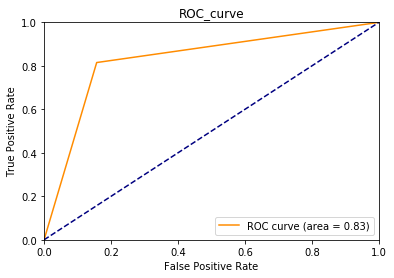

In [35]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(Y1_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_curve')
plt.legend(loc="lower right")
plt.show()

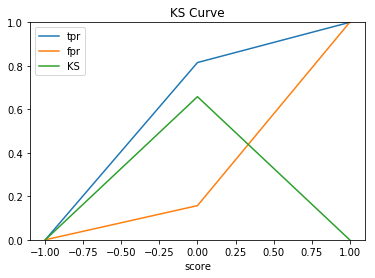

<Figure size 1440x1440 with 0 Axes>

In [36]:
fig, ax = plt.subplots()
ax.plot(1 - threshold, tpr, label='tpr') # ks曲线要按照预测概率降序排列，所以需要1-threshold镜像
ax.plot(1 - threshold, fpr, label='fpr')
ax.plot(1 - threshold, tpr-fpr,label='KS')
plt.xlabel('score')
plt.title('KS Curve')
plt.ylim([0.0, 1.0])
plt.figure(figsize=(20,20))
legend = ax.legend(loc='upper left')
plt.show()

# SVR

In [37]:
from sklearn.svm import SVR

In [38]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [39]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X, Y, test_size = 0.6, random_state = 0)#二氧化硅

In [40]:
linear_svr = SVR(kernel='linear')#分别采用三种核函数对X1回归
linear_svr.fit(X1_train,Y1_train)
linear_svr_y_predict = linear_svr.predict(X1_test)
r=linear_svr.score(X1_test,Y1_test)
print ('R^2 of linear SVR is',r)
poly_svr = SVR(kernel='poly')
poly_svr.fit(X1_train,Y1_train)
poly_svr_y_predict = poly_svr.predict(X1_test)
r=poly_svr.score(X1_test,Y1_test)
print ('R^2 of poly SVR is',r)
rbf_svr = SVR(kernel='rbf')
rbf_svr.fit(X1_train,Y1_train)
rbf_svr_y1_predict = rbf_svr.predict(X1_test)
r=rbf_svr.score(X1_test,Y1_test)
print ('R^2 of rbf SVR is',r)

R^2 of linear SVR is 0.45242799413851276
R^2 of poly SVR is 0.34549778563651046
R^2 of rbf SVR is 0.4567484825896595


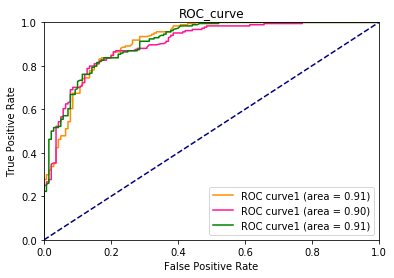

In [41]:
y_pred=clf.predict(X1_test)
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
#fpr, tpr, threshold = roc_curve1(Y1_test, linear_svr_y_predict)
fpr[0], tpr[0], _ = roc_curve(y_test.ravel(),linear_svr_y_predict.ravel())
roc_auc[0] = auc(fpr[0], tpr[0])
fpr[1], tpr[1], _ = roc_curve(y_test.ravel(),poly_svr_y_predict.ravel())
roc_auc[1] = auc(fpr[1], tpr[1])
fpr[2], tpr[2], _ = roc_curve(y_test.ravel(),rbf_svr_y1_predict.ravel())
roc_auc[2] = auc(fpr[2], tpr[2])
#fpr, tpr, threshold = roc_curve2(Y1_test, poly_svr_y_predict)
#fpr, tpr, threshold = roc_curve3(Y1_test, rbf_svr_y1_predict)
#roc_auc = auc(fpr, tpr)
plt.plot(fpr[0], tpr[0], color='darkorange',label='ROC curve1 (area = %0.2f)' % roc_auc[0])
plt.plot(fpr[1], tpr[1], color='deeppink',label='ROC curve1 (area = %0.2f)' % roc_auc[1])
plt.plot(fpr[2], tpr[2], color='green',label='ROC curve1 (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_curve')
plt.legend(loc="lower right")
plt.show()

ValueError: x and y must have same first dimension, but have shapes (3,) and (121,)

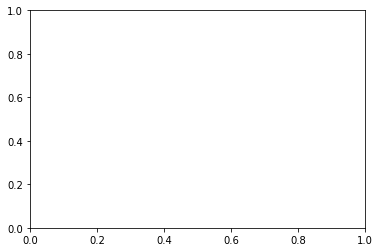

In [42]:
fig, ax = plt.subplots()
ax.plot(1 - threshold, tpr[0], label='tpr') # ks曲线要按照预测概率降序排列，所以需要1-threshold镜像
ax.plot(1 - threshold, fpr[0], label='fpr')
ax.plot(1 - threshold, tpr[0]-fpr[0],label='KS')
plt.xlabel('score')
plt.title('KS Curve')
plt.ylim([0.0, 1.0])
plt.figure(figsize=(20,20))
legend = ax.legend(loc='upper left')
plt.show()

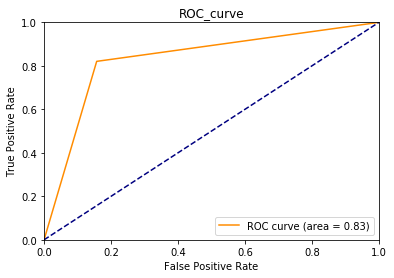

In [43]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(Y1_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_curve')
plt.legend(loc="lower right")
plt.show()

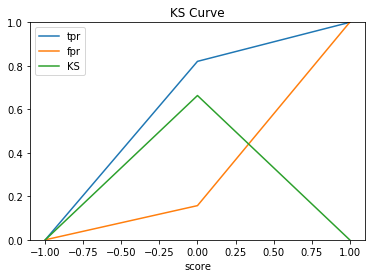

<Figure size 1440x1440 with 0 Axes>

In [44]:
fig, ax = plt.subplots()
ax.plot(1 - threshold, tpr, label='tpr') # ks曲线要按照预测概率降序排列，所以需要1-threshold镜像
ax.plot(1 - threshold, fpr, label='fpr')
ax.plot(1 - threshold, tpr-fpr,label='KS')
plt.xlabel('score')
plt.title('KS Curve')
plt.ylim([0.0, 1.0])
plt.figure(figsize=(20,20))
legend = ax.legend(loc='upper left')
plt.show()

# 利用决策树算法进行模型训练

In [45]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X, Y, test_size = 0.6, random_state = 0)#二氧化硅

In [46]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='gini')
clf.fit(X1_train,Y1_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [47]:
y_pred  = clf.predict(X1_test)

In [48]:
y_pred

array([0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,

In [49]:
from sklearn.metrics import confusion_matrix

In [50]:
cm = confusion_matrix(Y1_test, y_pred)
cm

array([[104,  36],
       [ 48, 136]], dtype=int64)

In [51]:
accurancy = (cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])
accurancy

0.7407407407407407

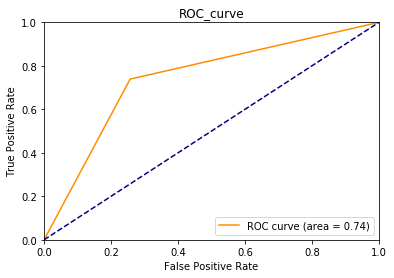

In [52]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(Y1_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_curve')
plt.legend(loc="lower right")
plt.show()

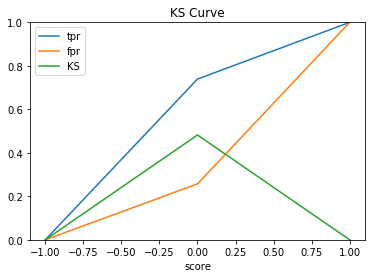

<Figure size 1440x1440 with 0 Axes>

In [53]:
fig, ax = plt.subplots()
ax.plot(1 - threshold, tpr, label='tpr') # ks曲线要按照预测概率降序排列，所以需要1-threshold镜像
ax.plot(1 - threshold, fpr, label='fpr')
ax.plot(1 - threshold, tpr-fpr,label='KS')
plt.xlabel('score')
plt.title('KS Curve')
plt.ylim([0.0, 1.0])
plt.figure(figsize=(20,20))
legend = ax.legend(loc='upper left')
plt.show()

# 朴素贝叶斯

In [54]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X, Y, test_size = 0.6, random_state = 0)#二氧化硅

In [55]:
from sklearn.naive_bayes import GaussianNB
gnb_model=GaussianNB()
gnb_model.fit(X1_train,Y1_train)
# 训练集
#模型预测可以给出概率的结果
train_probs=gnb_model.predict_proba(X1_train)
#返回概率最高的结果
train_predict=gnb_model.predict(X1_train)
# 测试集
#模型预测可以给出概率的结果
test_probs=gnb_model.predict_proba(X1_test)
#返回概率最高的结果
test_predict=gnb_model.predict(X1_test)

In [56]:
test_predict

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,

In [57]:
from sklearn.metrics import confusion_matrix

In [58]:
cm = confusion_matrix(Y1_test, test_predict)
cm

array([[113,  27],
       [ 48, 136]], dtype=int64)

In [59]:
accurancy = (cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])
accurancy

0.7685185185185185

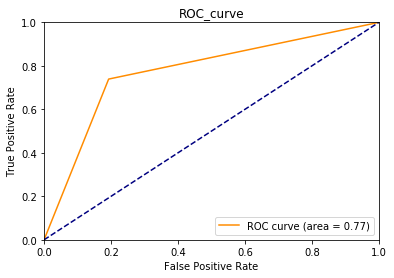

In [60]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(Y1_test, test_predict)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_curve')
plt.legend(loc="lower right")
plt.show()

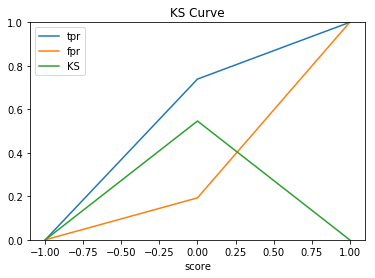

<Figure size 1440x1440 with 0 Axes>

In [61]:
fig, ax = plt.subplots()
ax.plot(1 - threshold, tpr, label='tpr') # ks曲线要按照预测概率降序排列，所以需要1-threshold镜像
ax.plot(1 - threshold, fpr, label='fpr')
ax.plot(1 - threshold, tpr-fpr,label='KS')
plt.xlabel('score')
plt.title('KS Curve')
plt.ylim([0.0, 1.0])
plt.figure(figsize=(20,20))
legend = ax.legend(loc='upper left')
plt.show()

# 随机森林

In [62]:
from sklearn import datasets,svm,metrics,model_selection,preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# 实例化随机森林
rfc=RandomForestClassifier()
# 调参参数设置
rf_param_grid = {'n_estimators':[100,200,500], 'min_samples_split':[2,3,5,10], 
                 'min_samples_leaf':[4,6,10], 'max_depth':[10,50]}
rf_grid = model_selection.GridSearchCV(rfc, rf_param_grid, cv=5, n_jobs=12, verbose=1, scoring='accuracy')
# 训练模型
rf_grid.fit(X1_train, Y1_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:   17.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:   32.7s
[Parallel(n_jobs=12)]: Done 360 out of 360 | elapsed:   52.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [63]:
test_est = rf_grid.predict(X1_test)
print('随机森林精确度...')
print(metrics.classification_report(test_est, Y1_test))
print('随机森林 AUC...')
fpr_test, tpr_test, th_test = metrics.roc_curve(test_est, Y1_test)
     # 构造 roc 曲线
print('AUC = %.4f' %metrics.auc(fpr_test, tpr_test))

随机森林精确度...
              precision    recall  f1-score   support

           0       0.80      0.76      0.78       148
           1       0.80      0.84      0.82       176

    accuracy                           0.80       324
   macro avg       0.80      0.80      0.80       324
weighted avg       0.80      0.80      0.80       324

随机森林 AUC...
AUC = 0.7988


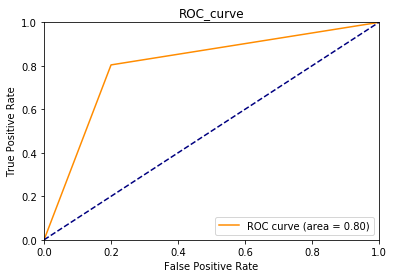

In [64]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(Y1_test,test_est)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_curve')
plt.legend(loc="lower right")
plt.show()

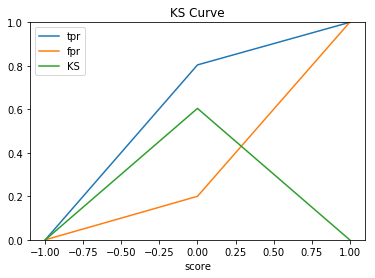

<Figure size 1440x1440 with 0 Axes>

In [65]:
fig, ax = plt.subplots()
ax.plot(1 - threshold, tpr, label='tpr') # ks曲线要按照预测概率降序排列，所以需要1-threshold镜像
ax.plot(1 - threshold, fpr, label='fpr')
ax.plot(1 - threshold, tpr-fpr,label='KS')
plt.xlabel('score')
plt.title('KS Curve')
plt.ylim([0.0, 1.0])
plt.figure(figsize=(20,20))
legend = ax.legend(loc='upper left')
plt.show()